<a href="https://colab.research.google.com/github/kjm12misa/Google_drive/blob/main/Python/chapter_9_3(%EB%94%A5%EB%9F%AC%EB%8B%9D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chapter.9_3
#### LSTM 과 GRU 셀


#### LSTM 신경망 훈련(Long Short-Term Menory)
- RNN은 실무에서 쓰지 않음
- 문장이 길면 학습 능력이 떨어지는 것을 대안하기 위해 나옴.
 + 단기 기억을 오래 기억하게 하기 위한 것. (ex. 메모_다시 꺼내서 보는 것과 같음)


#### 데이터 불러오고 + 훈련, 검증 세트 나누기

In [ ]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

train_input.shape, val_input.shape, train_target.shape, val_target.shape

((20000,), (5000,), (20000,), (5000,))

#### padding

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)
print(train_seq.shape, val_seq.shape)

(20000, 100) (5000, 100)


#### 모형 만들기

In [ ]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_1 (LSTM)               (None, 8)                 800       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 14s 23ms/step - loss: 0.6928 - accuracy: 0.5243 - val_loss: 0.6922 - val_accuracy: 0.5428
Epoch 2/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6911 - accuracy: 0.5857 - val_loss: 0.6900 - val_accuracy: 0.6036
Epoch 3/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6875 - accuracy: 0.6353 - val_loss: 0.6847 - val_accuracy: 0.6462
Epoch 4/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6759 - accuracy: 0.6720 - val_loss: 0.6623 - val_accuracy: 0.6656
Epoch 5/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6242 - accuracy: 0.7186 - val_loss: 0.6078 - val_accuracy: 0.7224
Epoch 6/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5909 - accuracy: 0.7333 - val_loss: 0.5857 - val_accuracy: 0.7378
Epoch 7/100
313/313 [==============================] - 7s 21ms/step - loss: 0.5685 - accuracy: 0.7502 - val_loss: 0.5664 - val_accuracy

#### 손실 곡선 추가
- 기본 순환층 보다 LSTM이 과대적합을 억제하면서 훈련을 잘 수행함.
- 과대적합을 더 강하게 제어하기 위해 드롭아웃을 적용 시켜 보자.

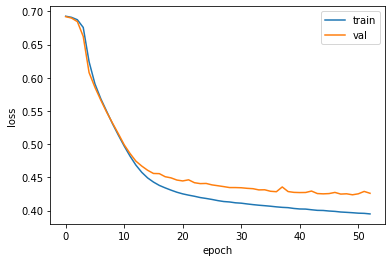

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 순환층에 드롭아웃 적용
- 앞에 것과 중복으로 model2로 설정하여 모형 만들고 모형평가

Epoch 1/10
313/313 [==============================] - 11s 25ms/step - loss: 0.6924 - accuracy: 0.5264 - val_loss: 0.6915 - val_accuracy: 0.5654
Epoch 2/10
313/313 [==============================] - 7s 21ms/step - loss: 0.6892 - accuracy: 0.6015 - val_loss: 0.6862 - val_accuracy: 0.6436
Epoch 3/10
313/313 [==============================] - 7s 21ms/step - loss: 0.6737 - accuracy: 0.6750 - val_loss: 0.6473 - val_accuracy: 0.6990
Epoch 4/10
313/313 [==============================] - 7s 21ms/step - loss: 0.5999 - accuracy: 0.7080 - val_loss: 0.5804 - val_accuracy: 0.7162
Epoch 5/10
313/313 [==============================] - 6s 21ms/step - loss: 0.5702 - accuracy: 0.7206 - val_loss: 0.5574 - val_accuracy: 0.7386
Epoch 6/10
313/313 [==============================] - 7s 21ms/step - loss: 0.5498 - accuracy: 0.7369 - val_loss: 0.5389 - val_accuracy: 0.7434
Epoch 7/10
313/313 [==============================] - 7s 22ms/step - loss: 0.5338 - accuracy: 0.7477 - val_loss: 0.5231 - val_accuracy: 0.760

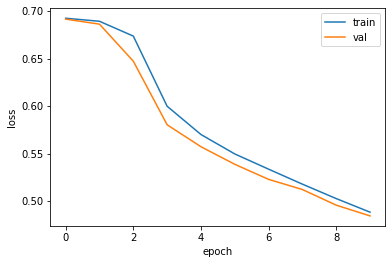

In [ ]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
# 드롭아웃 추가
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

# epcohs = 100
history = model2.fit(train_seq, train_target, epochs=10, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 2개의 층 연결
- 주의할 점 : 모든 순환층의 순차 데이터가 필요. 따라서, 앞쪽의 순환층의 모든 타임스텝에 대한 은닉 상태를 출력해야 함.
 + 케라스의 순환층에서 모든 타임스텝의 은닉 상태를 출력하려면 마지막을 제외한 다른 모든 순환층에서 return_sequences 매개변수를  True로 지정하면 됨.

In [ ]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True)) # 모든 순환층에서 은닉 출력
model3.add(keras.layers.LSTM(8, dropout=0.3)) # 마지막 타임스텝의 은닉상태만 출력하기 때문에 (None, 8)로 출력.
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_5 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_6 (LSTM)               (None, 8)                 544       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


- 앞에 코드를 반복(P.536~537)
 + 그래프를 보니 과대적합을 제어하면서 손실을 최대로 낮춘거 같다.